# K-means clustering homework

In [0]:
# imports
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [0]:
wine = datasets.load_wine()

Convert the dataset into the pandas DataFrame

In [0]:
x = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.DataFrame(wine.target, columns=['Target'])

Note that our features probably have different scales, so we will need to scale them once we start with clustering


In [45]:
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


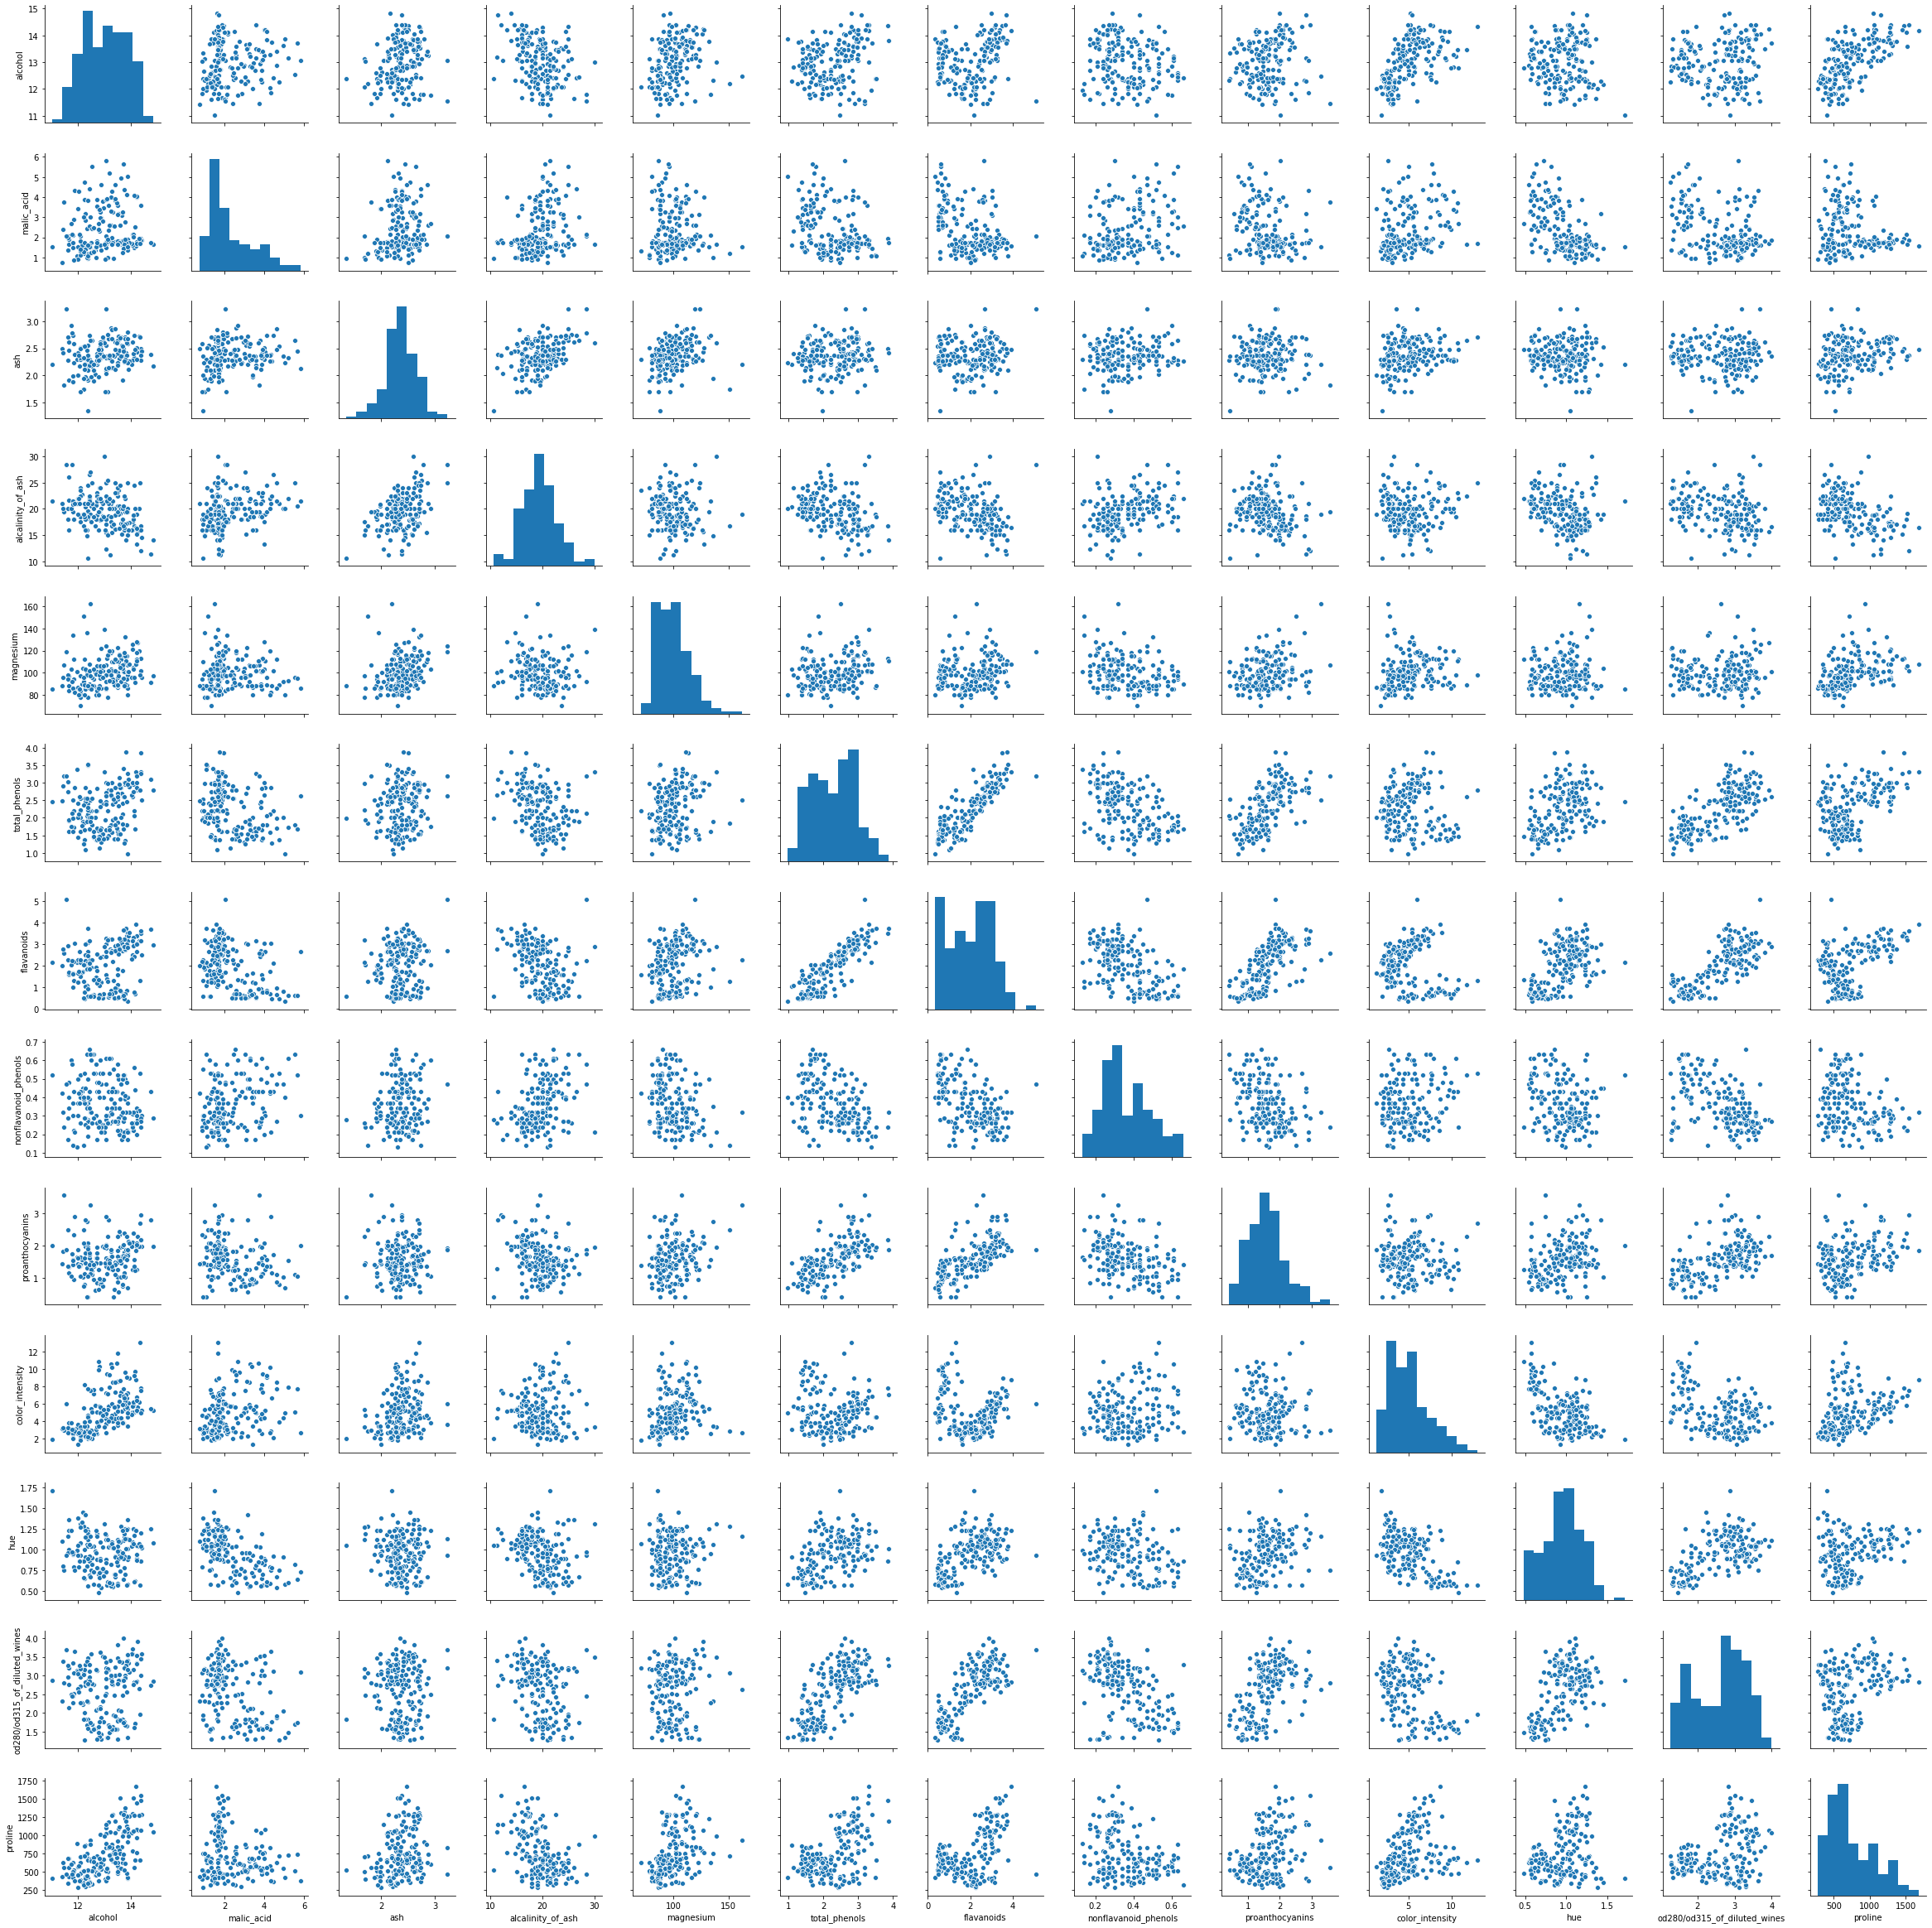

In [9]:
sns.pairplot(x)

Remember, that when we use unsupervised learning, we do not have the labels available (unless it is used as a pre-step for supervised learning).
For the purpose of subsequent classification we could use the code below:

In [0]:
# Make colored pairwise scatterplots
plt.rcParams['figure.figsize'] = (50, 50)
colors = np.array(['red', 'green', 'blue'])
point_colors = colors[x.join(y)['Target']]
nfeatures = x.shape[1]

for i in range(nfeatures):
  for j in range(nfeatures):
    plt.subplot(nfeatures, nfeatures, i + nfeatures*j + 1)
    ith_feature = x.columns[i]
    jth_feature = x.columns[j]
    plt.scatter(x[ith_feature], x[jth_feature], c=point_colors, s=10)
    plt.title(f'{ith_feature} vs {jth_feature}')
    plt.xlabel(ith_feature)
    plt.ylabel(jth_feature)

Now let's pick a few pairs of features for clustering using the non-colored set of plots. There are no scatter plots with obvious cluster separation here, so let's pick one that most resembles that perfect case.

1) malic_acids vs flavanoids


Let's also pick a pair of features that does not look easily separable:

2) proanthocyanins vs ash

Let's also use the entire set of features as the 3rd option for comparison.

In [0]:
# Scale first
scaled = StandardScaler().fit_transform(x)
x_scaled = pd.DataFrame(scaled, columns=x.columns)

features_for_clustering_0 = ['malic_acid', 'flavanoids']
features_for_clustering_1 = ['proanthocyanins', 'ash']
x_2d_0 = x_scaled[features_for_clustering_0]
x_2d_1 = x_scaled[features_for_clustering_1]
x_13d = x_scaled # this definition is not really necessary

Let's apply k-means to our 3 sets of features, picking the best k with WCSS-method


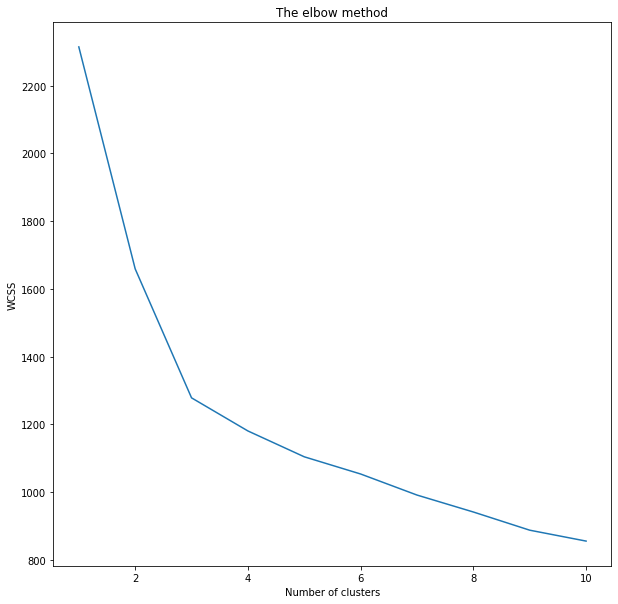

In [74]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x_13d)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.rcParams['figure.figsize'] = (10, 10) 
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

You can run this WCSS procedure above for the two other sets of features by analogy (or loop over them and make multiple subplots).
Note that in this case the elbow method does not give a very clear answer for the pairs of features. The whole trainng set does suggest k = 3.
Let's now run the clustering with a few different sets of features and use a few evaluation measures.

In [112]:
km = KMeans(n_clusters=3)
experiments = ['malic_acid + flavanoids, k = 3', 'proanthocyanins + ash, k = 3', 'All features, k = 3']
x_datasubsets = [x_2d_0, x_2d_1, x_13d]
labels_true = np.array(y).flatten()
experiment_scores = [[],[],[]]

for experiment_number, experiment in enumerate(experiments):
  predicted = km.fit_predict(x_datasubsets[experiment_number])

  adj_rand_score = metrics.adjusted_rand_score(predicted, labels_true)
  homogeneity_score = metrics.homogeneity_score(labels_true, predicted)
  completeness_score = metrics.completeness_score(labels_true, predicted)
  v_measure_score = metrics.v_measure_score(labels_true, predicted)
  silhouette_score = metrics.silhouette_score(x_13d, predicted, metric='euclidean')
  experiment_scores[experiment_number] = [adj_rand_score, homogeneity_score, 
                                          completeness_score, v_measure_score, 
                                          silhouette_score]

  print(f'Results of the experiment {experiment}:')
  print(f'Adjusted Rand score is {adj_rand_score}.')
  print(f'Homogeneity_score is {homogeneity_score}.')
  print(f'Completeness_score is {completeness_score}.')
  print(f'v_measure_score is {v_measure_score}.')
  print(f'Silhouette_score is {silhouette_score}.')
  print('\n')

results = pd.DataFrame(np.array(experiment_scores), index = experiments,
                       columns = ['Adjusted Rand score', 'Homogeneity score',
                                  'Completeness score', 'v-measure score', 
                                  'Silhouette score'])

Results of the experiment malic_acid + flavanoids, k = 3:
Adjusted Rand score is 0.35765610504854184.
Homogeneity_score is 0.3804323913532612.
Completeness_score is 0.3815390414080387.
v_measure_score is 0.3809849127584332.
Silhouette_score is 0.16514113762139235.


Results of the experiment proanthocyanins + ash, k = 3:
Adjusted Rand score is 0.09477436376267592.
Homogeneity_score is 0.11717452229832376.
Completeness_score is 0.11629073085254976.
v_measure_score is 0.11673095376265397.
Silhouette_score is 0.07650713905403855.


Results of the experiment All features, k = 3:
Adjusted Rand score is 0.8974949815093207.
Homogeneity_score is 0.8788432003662366.
Completeness_score is 0.8729636016078731.
v_measure_score is 0.875893534122307.
Silhouette_score is 0.2848589191898987.




In [113]:
results

,Adjusted Rand score,Homogeneity score,Completeness score,v-measure score,Silhouette score
"malic_acid + flavanoids, k = 3",0.357656,0.380432,0.381539,0.380985,0.165141
"proanthocyanins + ash, k = 3",0.094774,0.117175,0.116291,0.116731,0.076507
"All features, k = 3",0.897495,0.878843,0.872964,0.875894,0.284859


For my choice of features, the first pair of labels seems to perform better than the second with respect to all metrics. 
This matches the fact that I picked it as the easier separable (into clusters) case. Using all of the features seems to work more than just two, which also makes sense.

# Optional part (hierachical clustering): stay tuned...